In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 1. Upload Dataset

In [2]:
df=pd.read_csv(r"E:\Wust\web analysis\Project 2\archive (1)\E-commerce Customer Behavior - Sheet1.csv")

In [3]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


## 2. Data Preprocessing

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB
None


In [5]:
print(df.isnull().sum())


Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


**Overview:**

This dataset provides a comprehensive view of customer behavior within an e-commerce platform. Each entry in the dataset corresponds to a unique customer, offering a detailed breakdown of their interactions and transactions. The information is crafted to facilitate a nuanced analysis of customer preferences, engagement patterns, and satisfaction levels, aiding businesses in making data-driven decisions to enhance the customer experience.

**Columns:**

1. **Customer ID:**

    - Type: Numeric
    - Description: A unique identifier assigned to each customer, ensuring distinction across the dataset.
  
2. **Gender:**

    - Type: Categorical (Male, Female)
    - Description: Specifies the gender of the customer, allowing for gender-based analytics.
 
3. **Age:**

    - Type: Numeric
    - Description: Represents the age of the customer, enabling age-group-specific insights.
  
4. **City:**

    - Type: Categorical (City names)
    - Description: Indicates the city of residence for each customer, providing geographic insights.

5. **Membership Type:**

    - Type: Categorical (Gold, Silver, Bronze)
    - Description: Identifies the type of membership held by the customer, influencing perks and benefits.
  
6. **Total Spend:**

    - Type: Numeric
    - Description: Records the total monetary expenditure by the customer on the e-commerce platform.
  
7. **Items Purchased:**

    - Type: Numeric
    - Description: Quantifies the total number of items purchased by the customer.
  
8. **Average Rating:**

    - Type: Numeric (0 to 5, with decimals)
    - Description: Represents the average rating given by the customer for purchased items, gauging satisfaction.
  
9. **Discount Applied:**

    - Type: Boolean (True, False)
    - Description: Indicates whether a discount was applied to the customer's purchase, influencing buying behavior.

10. **Days Since Last Purchase:**

    - Type: Numeric
    - Description: Reflects the number of days elapsed since the customer's most recent purchase, aiding in retention analysis.
  
11. **Satisfaction Level:**

     - Type: Categorical (Satisfied, Neutral, Unsatisfied)
     - Description: Captures the overall satisfaction level of the customer, providing a subjective measure of their experience.
  

**Key preprocessing steps:**

   - Handle missing values (if any)

   - Check for duplicates

   - Convert categorical variables to appropriate types

   - Ensure numerical variables are correctly typed

## 3. Exploratory Data Analysis (EDA)

### 3.1 Satisfaction Level Distribution

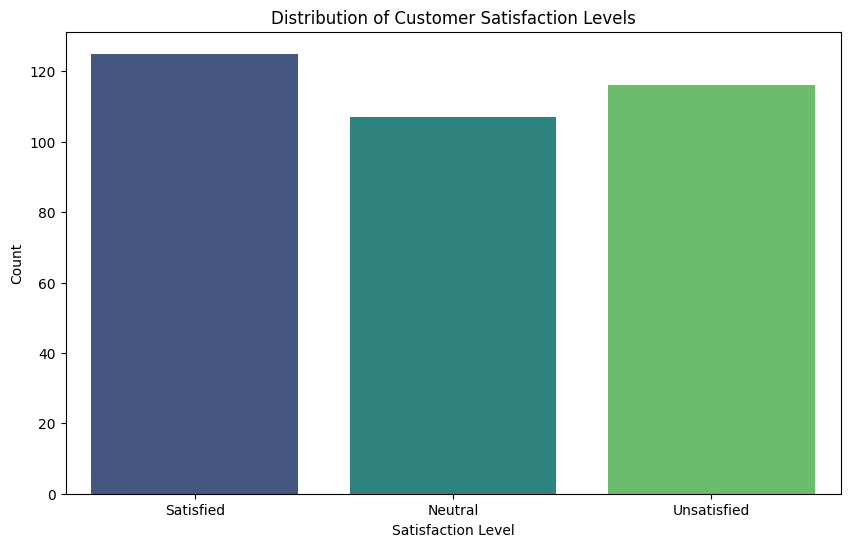

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Satisfaction Level', palette='viridis')
plt.title('Distribution of Customer Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()

### 3.2 Satisfaction by Gender

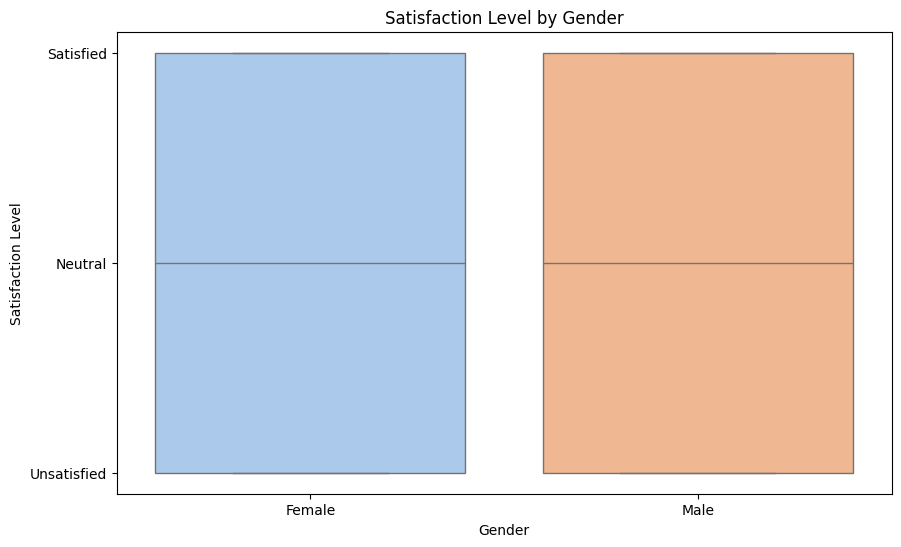

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Satisfaction Level', palette='pastel')
plt.title('Satisfaction Level by Gender')
plt.show()

### 3.3 Satisfaction by Age Groups

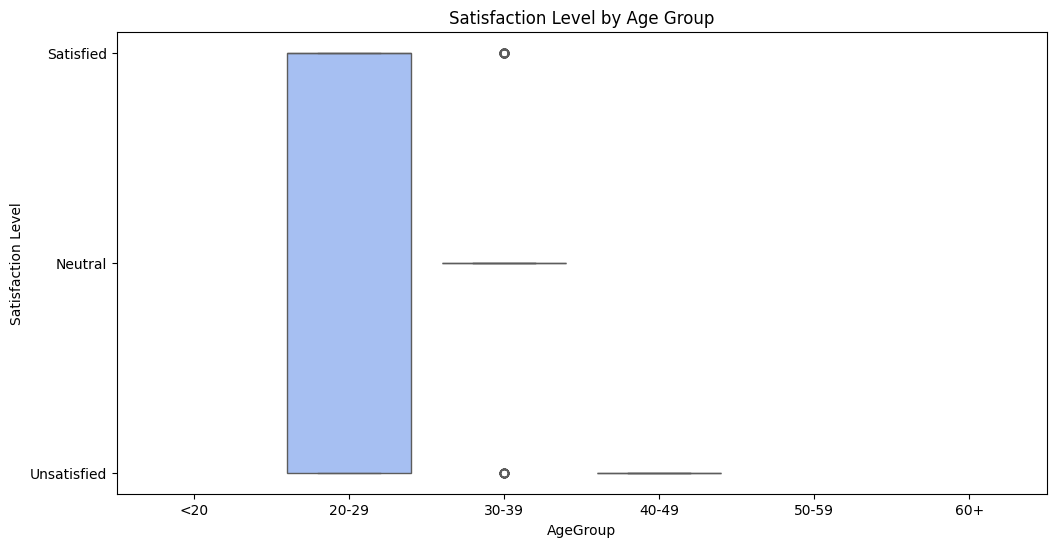

In [8]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], 
                        labels=['<20', '20-29', '30-39', '40-49', '50-59', '60+'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AgeGroup', y='Satisfaction Level', palette='coolwarm')
plt.title('Satisfaction Level by Age Group')
plt.show()

### 3.4 Satisfaction by Age Groups

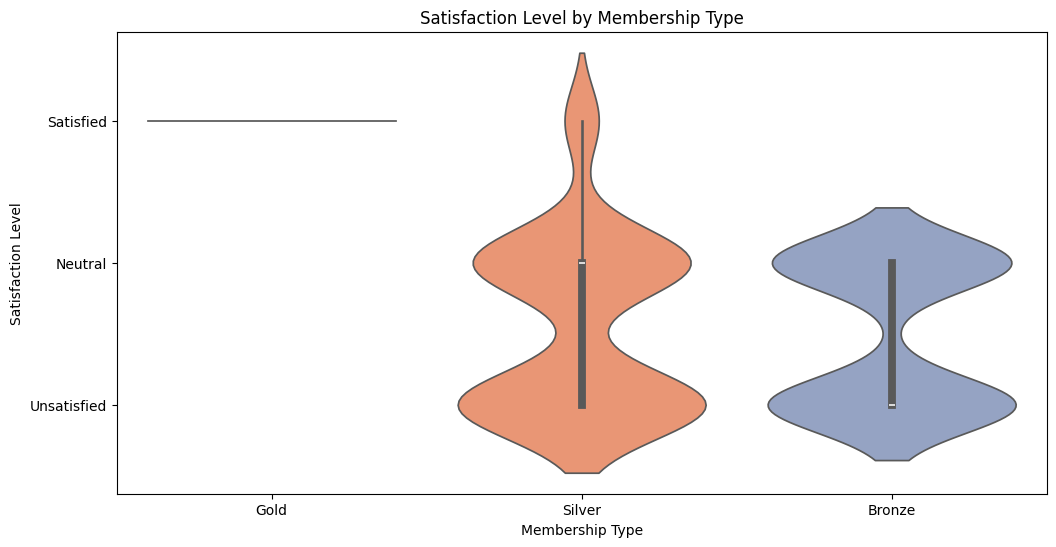

In [9]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Membership Type', y='Satisfaction Level', palette='Set2')
plt.title('Satisfaction Level by Membership Type')
plt.show()

### 3.5 Correlation Analysis


Data Types:
Customer ID                    int64
Gender                        object
Age                            int64
City                          object
Membership Type               object
Total Spend                  float64
Items Purchased                int64
Average Rating               float64
Discount Applied                bool
Days Since Last Purchase       int64
Satisfaction Level            object
AgeGroup                    category
dtype: object

Unique values in Satisfaction Level:
['Satisfied' 'Neutral' 'Unsatisfied' nan]

After conversion:
[ 4.  3.  2. nan]

Checking non-numeric values:


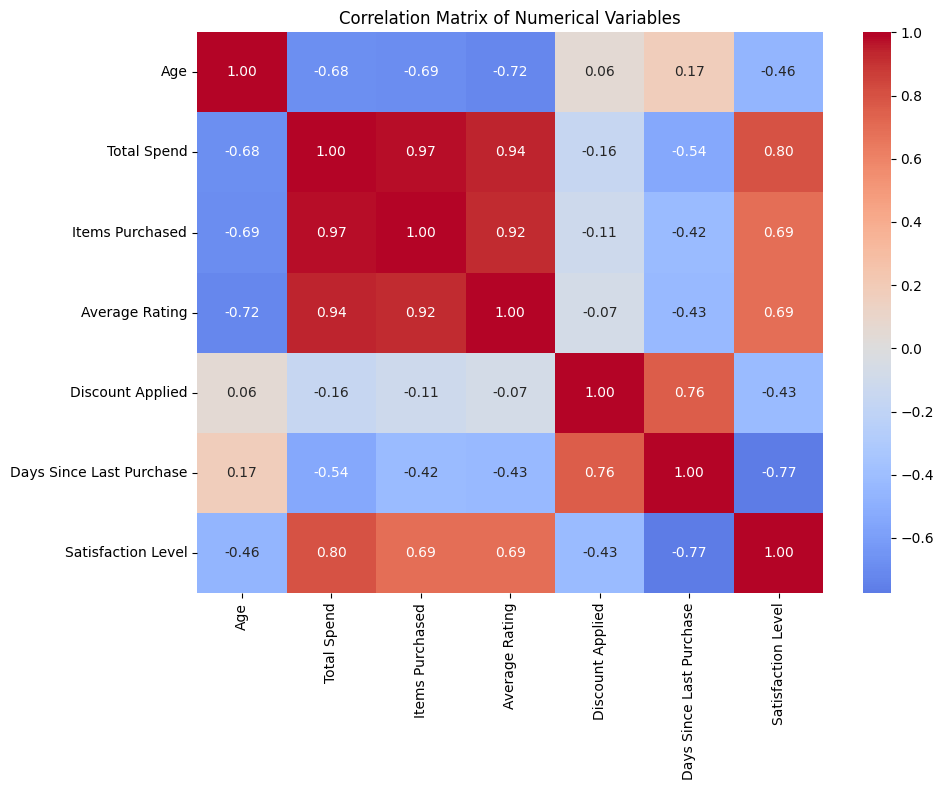


Correlation with Satisfaction Level:
Satisfaction Level          1.000000
Total Spend                 0.797494
Average Rating              0.694679
Items Purchased             0.692850
Discount Applied           -0.425115
Age                        -0.463274
Days Since Last Purchase   -0.773735
Name: Satisfaction Level, dtype: float64


In [11]:
# First, let's check the data types and unique values in each column
print("\nData Types:")
print(df.dtypes)

print("\nUnique values in Satisfaction Level:")
print(df['Satisfaction Level'].unique())

# Convert Satisfaction Level to numerical values if it's categorical
# Example mapping (adjust based on your actual values):
satisfaction_map = {
    'Very Unsatisfied': 1,
    'Unsatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very Satisfied': 5
}

# If your satisfaction levels are already numeric, skip this step
df['Satisfaction Level'] = df['Satisfaction Level'].map(satisfaction_map)

# Verify conversion
print("\nAfter conversion:")
print(df['Satisfaction Level'].unique())

# Now try the correlation matrix again
numerical_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 
                 'Discount Applied', 'Days Since Last Purchase', 'Satisfaction Level']

# Ensure all columns are numeric
print("\nChecking non-numeric values:")
for col in numerical_cols:
    if df[col].dtype == 'object':
        print(f"Column {col} has non-numeric values:")
        print(df[col].unique())

# If any other columns have issues, clean them similarly

# Now create the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Bonus: Print the correlation with Satisfaction Level sorted
print("\nCorrelation with Satisfaction Level:")
print(corr_matrix['Satisfaction Level'].sort_values(ascending=False))

## 4. Advanced Analysis

### 4.1 Satisfaction vs. Spending Patterns

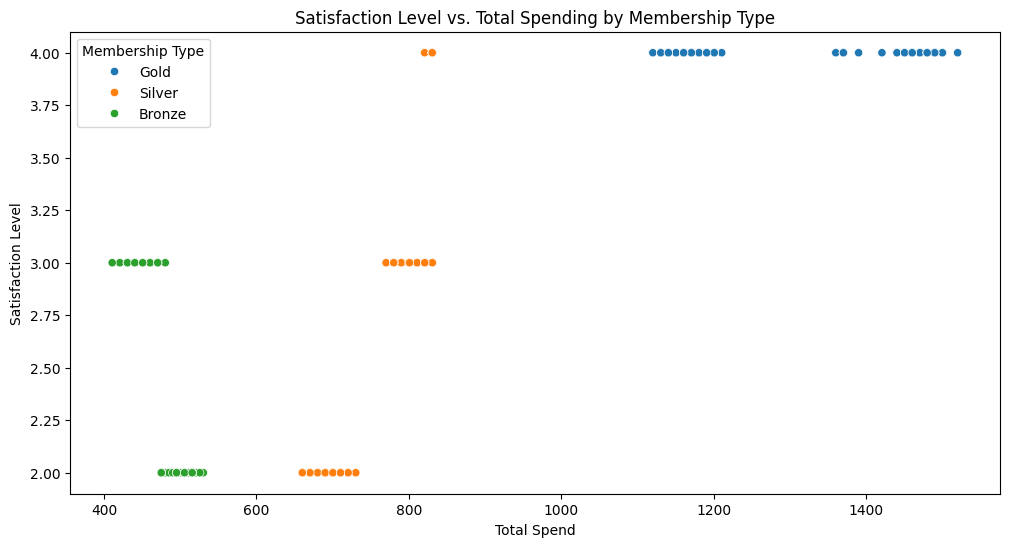

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Total Spend', y='Satisfaction Level', hue='Membership Type')
plt.title('Satisfaction Level vs. Total Spending by Membership Type')
plt.show()

### 4.2 Impact of Discounts on Satisfaction

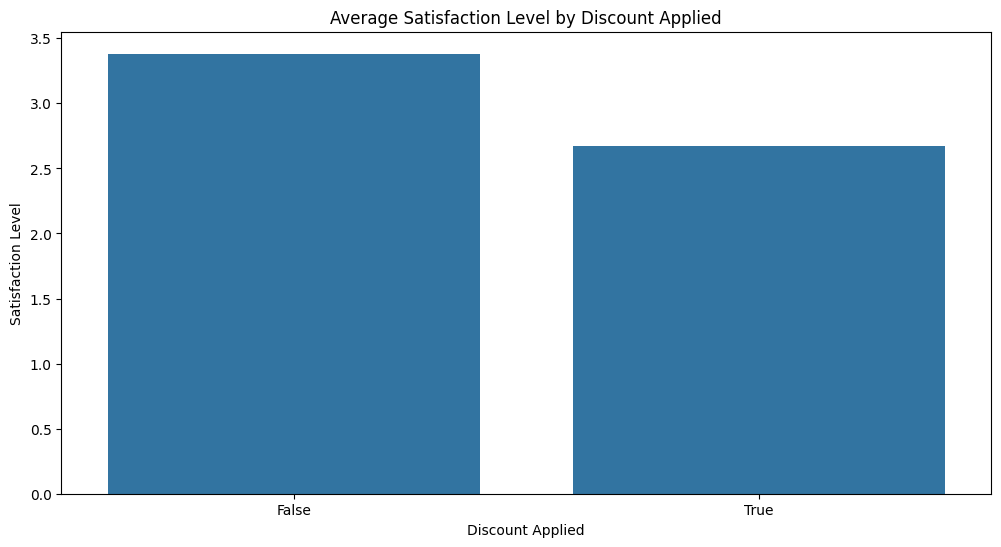

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Discount Applied', y='Satisfaction Level', ci=None)
plt.title('Average Satisfaction Level by Discount Applied')
plt.show()

### 4.3 Recency vs Satisfaction

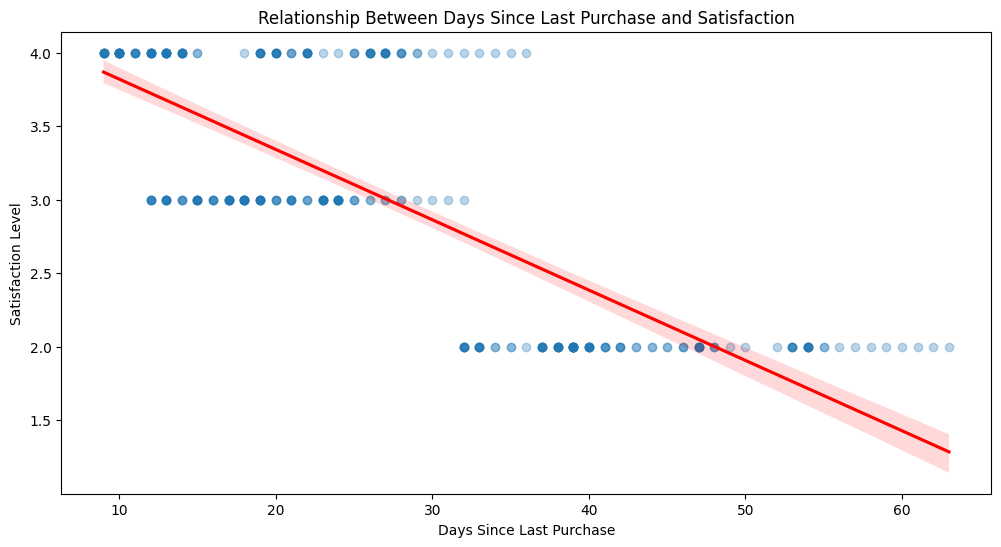

In [15]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='Days Since Last Purchase', y='Satisfaction Level', 
           scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship Between Days Since Last Purchase and Satisfaction')
plt.show()

**Statistical Testing (Optional)**

   - You could perform statistical tests to validate observed relationships:

   - ANOVA for satisfaction across membership types

   - t-test for satisfaction differences between genders

   - Correlation tests for numerical variables

**Key Insights to Explore**

Based on these analyses, you might find:

1. **Demographic Factors:**

   - Is satisfaction different between genders?

   - Which age group is most/least satisfied?

2. **Behavioral Factors:**

   - Do high-spending customers show different satisfaction patterns?

   - How does purchase frequency relate to satisfaction?

3. **Service Factors:**

   - Does membership type affect satisfaction?

   - How do discounts impact satisfaction?

   - Is there a relationship between product ratings and satisfaction?

4. **Temporal Factors:**

   - Does time since last purchase correlate with satisfaction?